Epoch 1/250
6/6 [==============================] - 1s 3ms/step - loss: 7.4400 - accuracy: 0.5000
Epoch 2/250
6/6 [==============================] - 0s 4ms/step - loss: 1.3485 - accuracy: 0.5400
Epoch 3/250
6/6 [==============================] - 0s 3ms/step - loss: 2.1725 - accuracy: 0.5000
Epoch 4/250
6/6 [==============================] - 0s 4ms/step - loss: 1.6106 - accuracy: 0.5133
Epoch 5/250
6/6 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.5867
Epoch 6/250
6/6 [==============================] - 0s 3ms/step - loss: 0.8733 - accuracy: 0.5533
Epoch 7/250
6/6 [==============================] - 0s 3ms/step - loss: 0.7666 - accuracy: 0.6100
Epoch 8/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.6367
Epoch 9/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.6467
Epoch 10/250
6/6 [==============================] - 0s 4ms/step - loss: 0.6105 - accuracy: 0.6567
Epoch 11/250
6/6 [===========

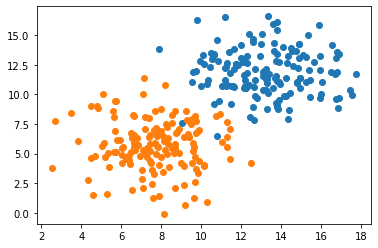

In [1]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 150
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=250, shuffle='true')

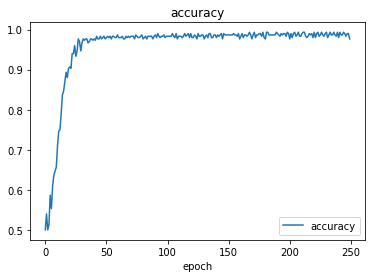

In [2]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

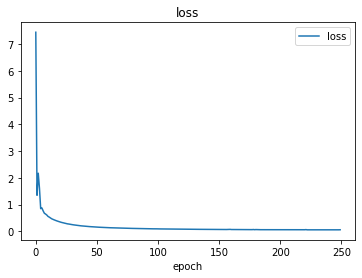

In [3]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [4]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is  [[0.9970331]]


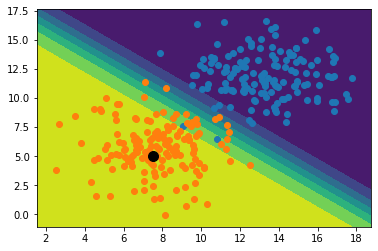

In [5]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x= 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="black")
print("Prediction is ", prediction)